# 

# Intro à Scikit-Learn

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Régression

### Données

https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset


Descripteurs (features) :

* `CRIM`: taux de criminalité par habitant par ville
* `ZN`: proportion de terrains résidentiels zonés pour les lots de plus de 25 000 pi.ca.
* `INDUS`: proportion d'acres commerciaux/non-commerciaux par ville
* `CHAS`: variable fictive de Charles River (= 1 si la zone délimite la rivière; 0 sinon)
* `NOX`: concentration d'oxydes nitriques (parties par 10 millions)
* `RM`: nombre moyen de pièces par logement
* `AGE`: proportion de logements occupés par leur propriétaire construits avant 1940
* `DIS`: distances pondérées des cinq centres d'emploi de Boston
* `RAD`: indice d'accessibilité aux autoroutes radiales
* `TAX`: taux d'imposition foncière de la valeur totale par tranche de 10 000 $
* `PTRATIO`: ratio élèves-enseignant par ville
* `B`: 1000(A - 0.63)^2 où A est la proportion d'habitants afro-américains par ville
* `LSTAT`: pourcentage d'habitant en dessous du seuil de pauvreté

Cible (target) :

* `MEDV`: Valeur médiane des logements occupés par leur propriétaire en 1 000 $

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

%config InlineBackend.figure_format='retina'  # For high DPI display

#### Chargement des données

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

/home/tkunda/Envs/isd_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
from sklearn.utils import Bunch

# Bunch?

In [6]:
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [7]:
type(boston.data)

numpy.ndarray

In [8]:
print(boston.data.shape, boston.target.shape)

(506, 13) (506,)


In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

#### Sélection des données d'apprentissage

In [10]:
FT_NAME = "LSTAT"

idx = list(boston.feature_names).index(FT_NAME)
idx

12

Ajout d'une dimension (`np.newaxis`) lorsqu'un seul descripteur est sélectionné, pour maintenir le format en colonne(s).

In [11]:
boston.data[:, np.newaxis, 12].shape

(506, 1)

In [12]:
# ou
boston.data[:, idx].reshape(-1, 1).shape

(506, 1)

In [13]:
xs_1d = boston.data[:, idx].reshape(-1, 1)
print(xs_1d.shape)

ys = boston.target
print(ys.shape)

(506, 1)
(506,)


Disposition attendue des descripteurs (*features*) et des valeurs cibles (*labels*):

![](img/05.02-samples-features.png)

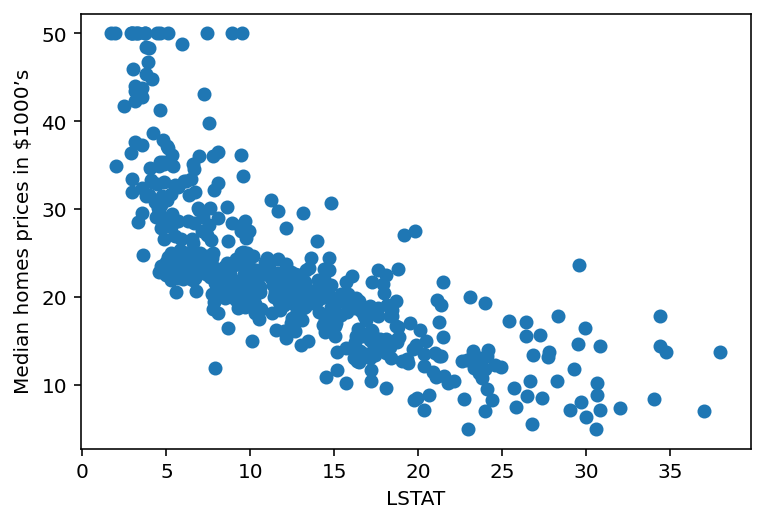

In [14]:
plt.scatter(xs_1d[:, -1], ys)
plt.xlabel(FT_NAME)
plt.ylabel("Median homes prices in $1000’s")
plt.show()

##### Échantillonnage aléatoire des données d'entrainement et de test

In [15]:
from sklearn.model_selection import train_test_split

xs_train, xs_test, ys_train, ys_test = train_test_split(
    xs_1d, ys, random_state=1
)

### Entrainement

In [16]:
# 1. Choix du modèle (classe)
from sklearn.linear_model import LinearRegression

# 2. Instantiaiton
model_1d = LinearRegression()

# 3.  Apprentissage (fit) du model
model_1d.fit(xs_train, ys_train)

# 4. predict on new data
ys_pred = model_1d.predict(xs_test)

### Résultats

#### Graphiques

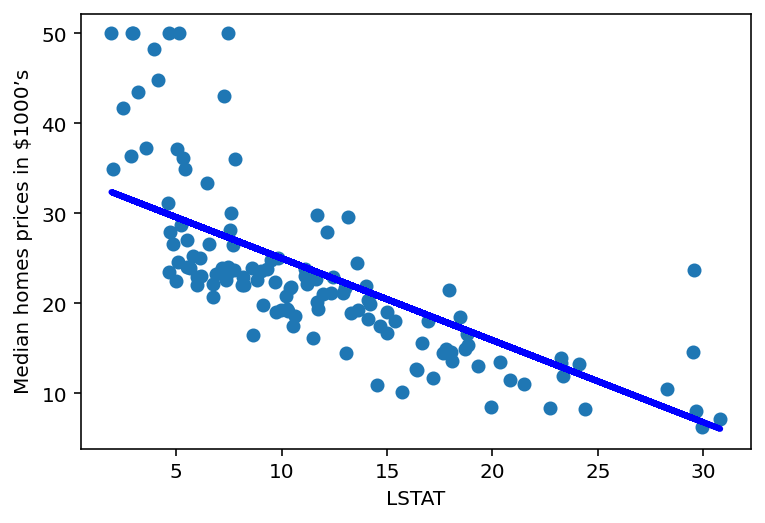

In [17]:
# Plot outputs
plt.scatter(xs_test[:, -1], ys_test)
plt.plot(xs_test[:, -1], ys_pred, color="blue", linewidth=3)
plt.xlabel(FT_NAME)
plt.ylabel("Median homes prices in $1000’s")
plt.show()

#### Évaluations

* [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)
* [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ys_test, ys_pred)
r2 = r2_score(ys_test, ys_pred)

print(f"MSE = {mse:.2f}")
print(f"R^2 = {r2:.4f}")

MSE = 46.29
R^2 = 0.5327


### Cas non-linéaires

* Astuce: adapter la régression linéaire en transformant les données selon des fonctions de base
* Par exemple avec une projection polynomiale:
    $$\hat{y} = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$$
* Notez qu'il s'agit toujours d'un modèle linéaire
* Il est linéaire dans le sens où on ne multiplie ou ne divise jamais les coefficients
* Le descripteur unidimensionnel $x$ est projeté dans une ou plusieurs dimensions pour permettre de modéliser des relations plus complexes entre $x$ et $y$

In [19]:
print(xs_1d.shape)
xs_b = np.hstack([xs_1d, xs_1d ** 2])
print(xs_b.shape)

(506, 1)
(506, 2)


In [20]:
def apply_poly_basis(arr, deg=2):
    """
    >>> arr = np.arange(1., 4.).reshape(-1, 1)
    >>> arr   # Format expected by sklearn
    array([[1.],
           [2.],
           [3.]])
    >>> apply_poly_basis(arr, deg=3)
    array([[ 1.,  1.,  1.],
           [ 2.,  4.,  8.],
           [ 3.,  9., 27.]])
    """
    assert arr.ndim == 2

    arrs = [arr ** n for n in range(1, deg + 1)]

    return np.hstack(arrs)

In [21]:
DEG = 2

xs_train_b = apply_poly_basis(xs_train, deg=DEG)
xs_test_b = apply_poly_basis(xs_test, deg=DEG)
xs_test_b.shape

(127, 2)

In [22]:
# 1. Choix du modèle (classe)
from sklearn.linear_model import LinearRegression

# 2. Instantiaiton
model_b = LinearRegression()

# 3.  Apprentissage (fit) du model
model_b.fit(xs_train_b, ys_train)

# 4. predict on new data
ys_pred_b = model_b.predict(xs_test_b)

#### Graphiques

Construction d'une `array` à valeurs croissantes qui s'étendent des bornes inférieure et supérieure des données pour produire le résultat de la régression sur le graphique.

In [23]:
def plot_regression_line(xs, model, hop, deg=None):
    # Les valeurs limites de la 1re colonne des descripteurs
    x_min, x_max = xs[:, 0].min(), xs[:, 0].max()

    # L'array qui s'étend sur l'amplitude de valeurs des données (de pas HOP)
    xx = np.arange(x_min, x_max, hop).reshape(-1, 1)

    # Regénération éventuelle de la base polynomiale
    if deg is not None:
        xx = apply_poly_basis(xx, deg=deg)

    # Prédiction à l'aide du modèle pour produire la ligne de régression à tracer
    yy_pred = model.predict(xx)

    plt.plot(xx[:, 0], yy_pred, color="blue", linewidth=3)

In [24]:
HOP = 0.1

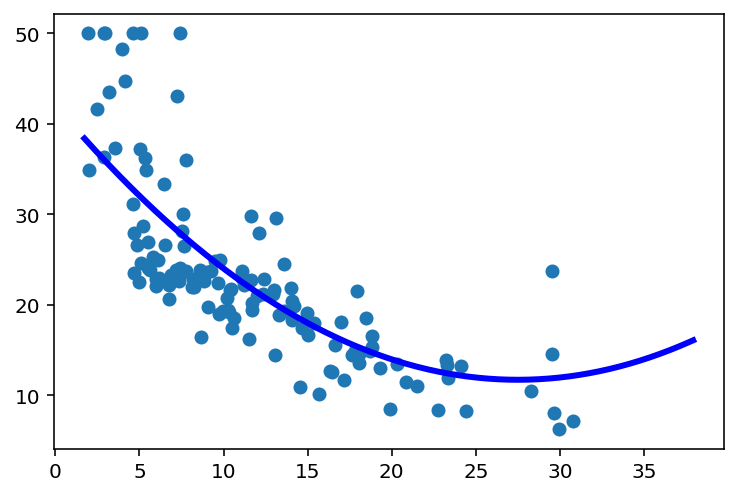

In [25]:
plot_regression_line(xs_train_b, model=model_b, hop=HOP, deg=DEG)
plt.scatter(xs_test_b[:, 0], ys_test)
plt.show()

#### Évaluations

In [26]:
mse = mean_squared_error(ys_test, ys_pred_b)
r2 = r2_score(ys_test, ys_pred_b)

print(f"MSE = {mse:.2f}")
print(f"R^2 = {r2:.4f}")

MSE = 35.98
R^2 = 0.6367


Coefficients $a_1$ et $a_2$ de la régression, provenant de l'équation suivante :

$$\hat{y}^{(i)} = a_0 + a_1 x_1^{(i)} + a_2 x_2^{(i)}$$

In [27]:
print("a_1 = {:.4f}, a_2 = {:.4f}".format(*model_b.coef_))

a_1 = -2.2088, a_2 = 0.0402


## Exercice

#### But : Tentez d'améliorer le résultat de la régression linéaire

* Réalisez de nouveau la régression linéaire en utilisant l'ensemble des 13 descripteurs (*features*) proposé, au lieu d'un seul. La sélection s'opère dès l'étape :
[Sélection des données d'apprentissage](#Sélection-des-données-d'apprentissage)

* Générez d'autres descripteurs en prenant, par exemple, le carré de leurs valeurs, pour prendre en compte la non-linéarité des relations

* Évaluez la performance de la régression en terme de MSE et R^2

* Identifiez les descripteurs qui semblent les plus significatifs pour cette régression, en observant la valeur de leur paramètre respectif ($a_j$ via `model.coef_`)

* Commentez succinctement

* Notez que la visualisation pose problème lorsque que l'on utilise plus d'un descripteur (plus de 2 en particulier), elle n'est donc pas nécessaire pour cet exercice

<span style="color:red">Implémentez votre solution ci-dessous</span>

---

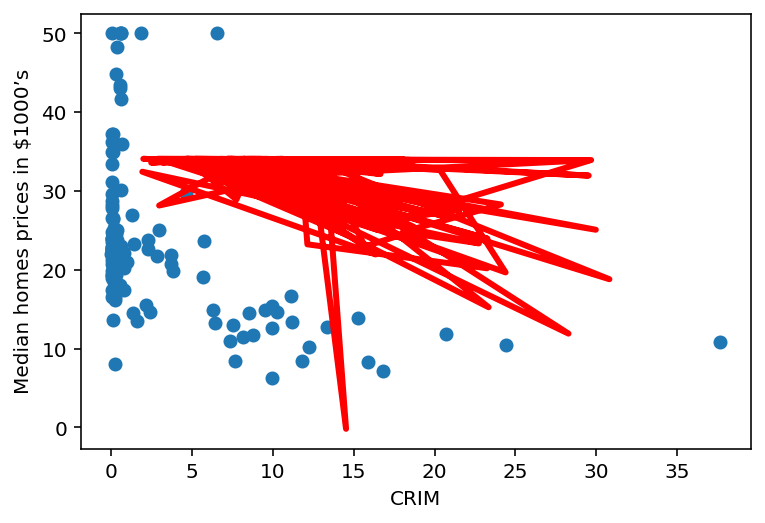

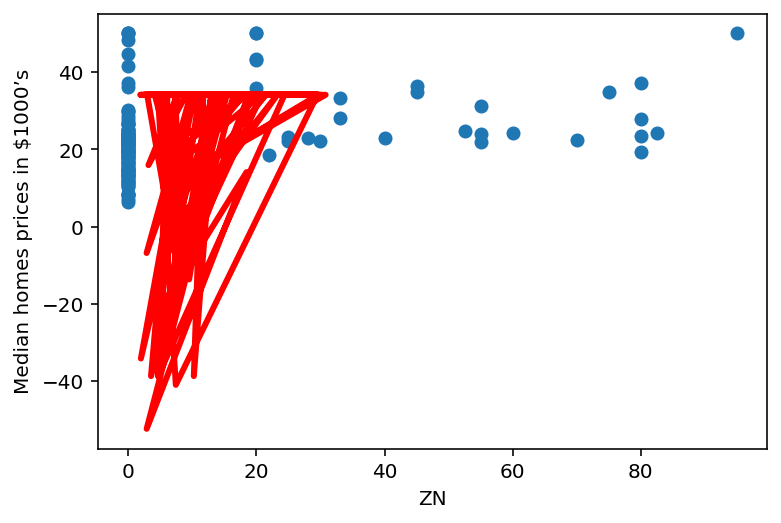

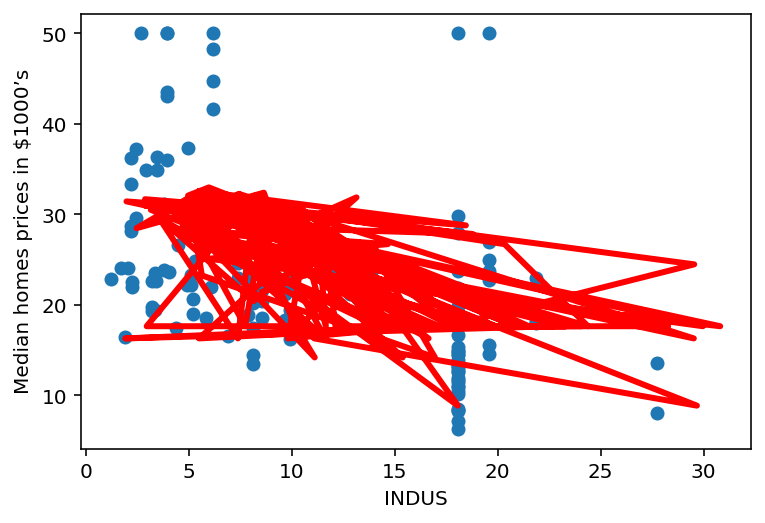

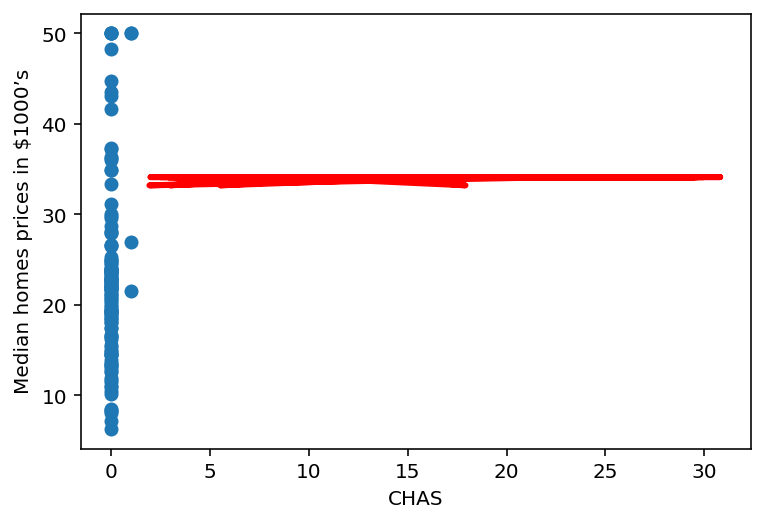

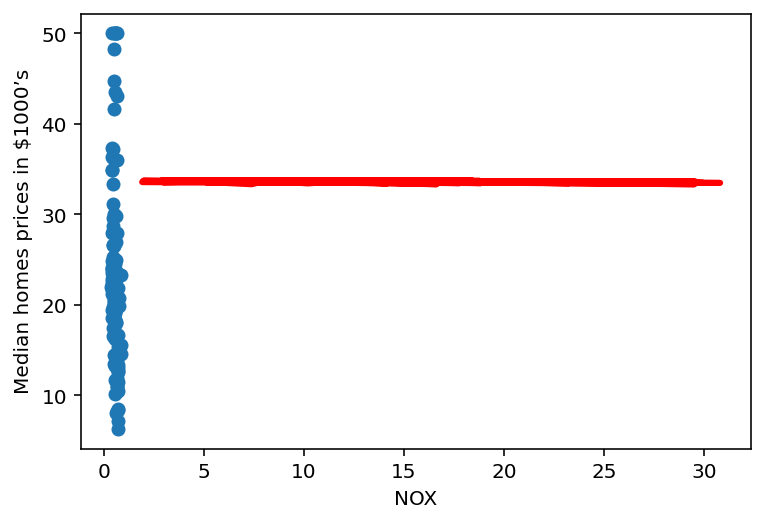

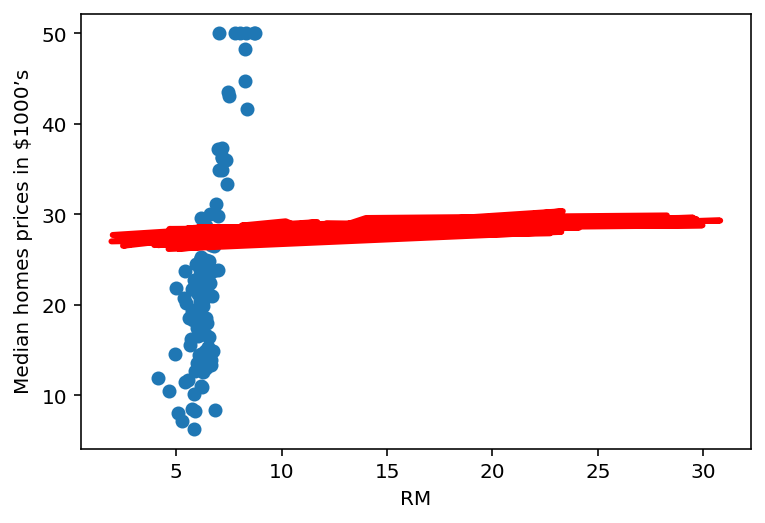

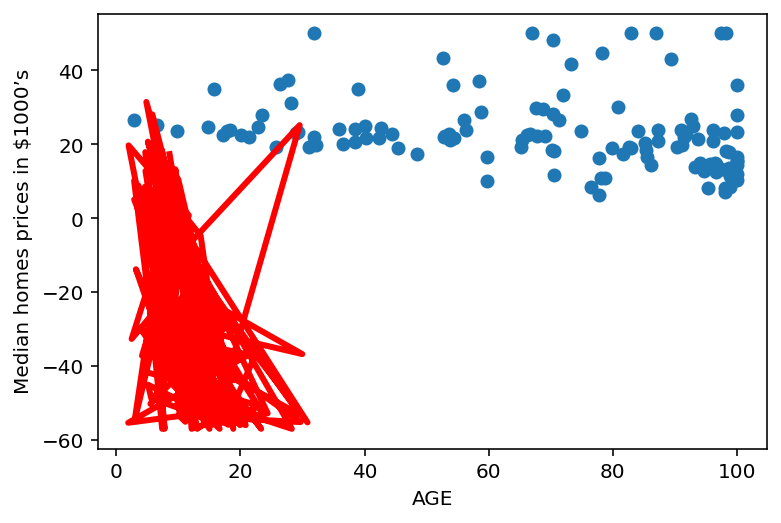

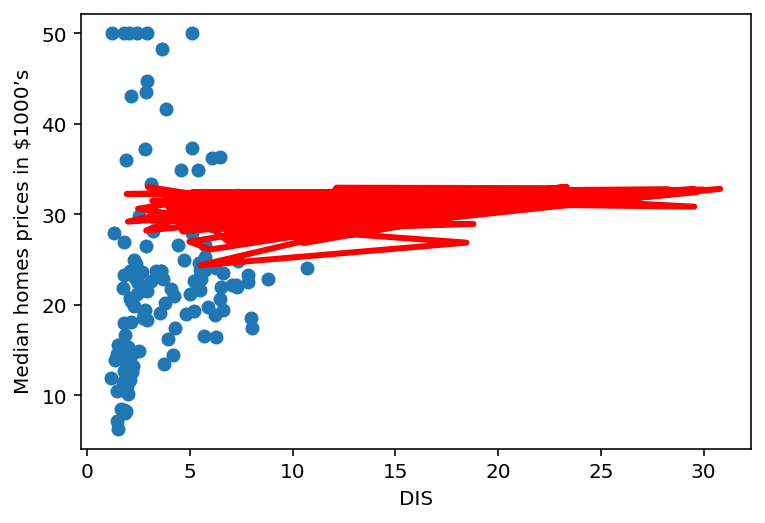

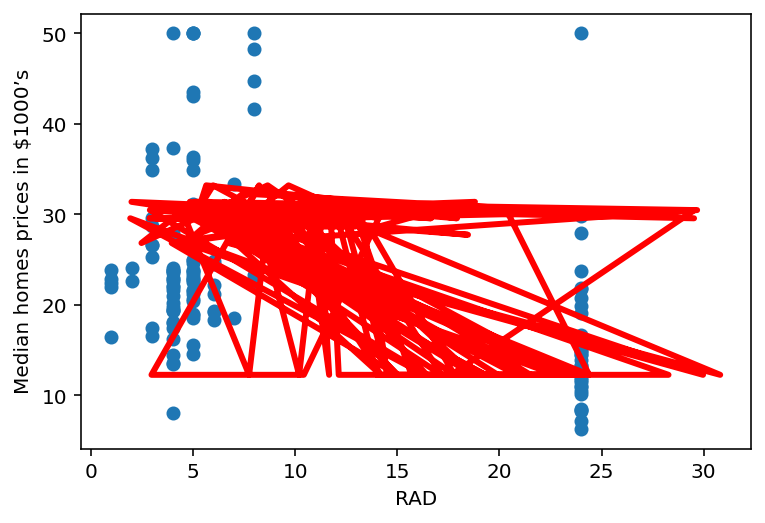

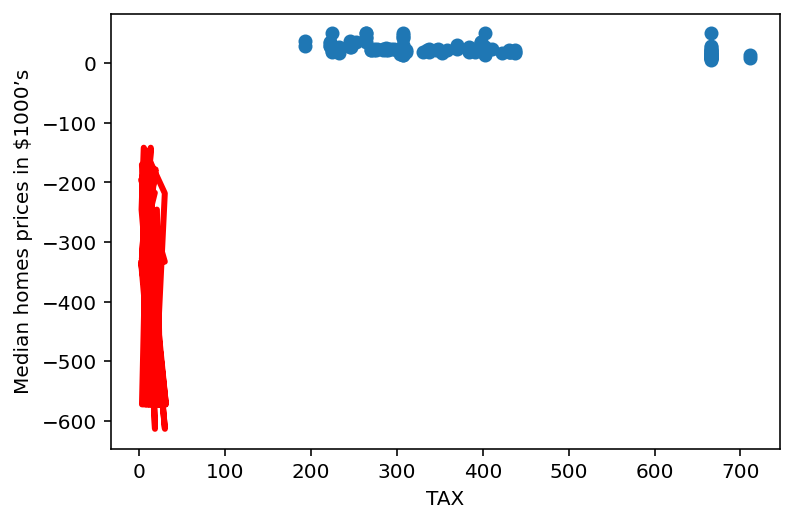

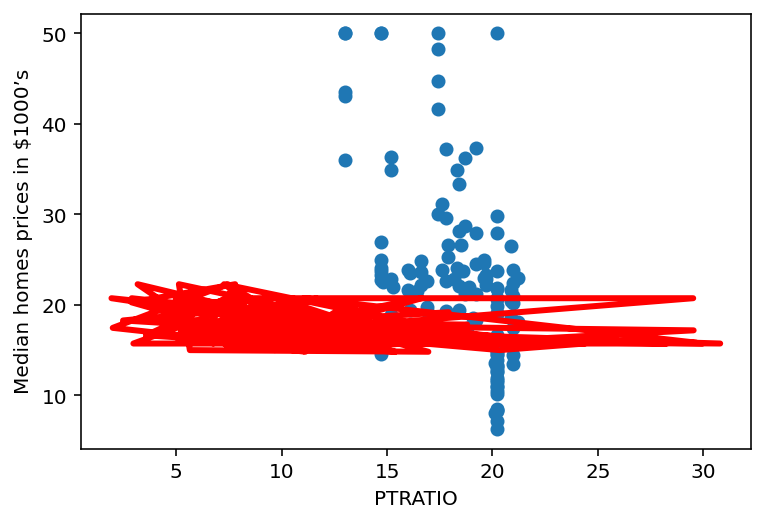

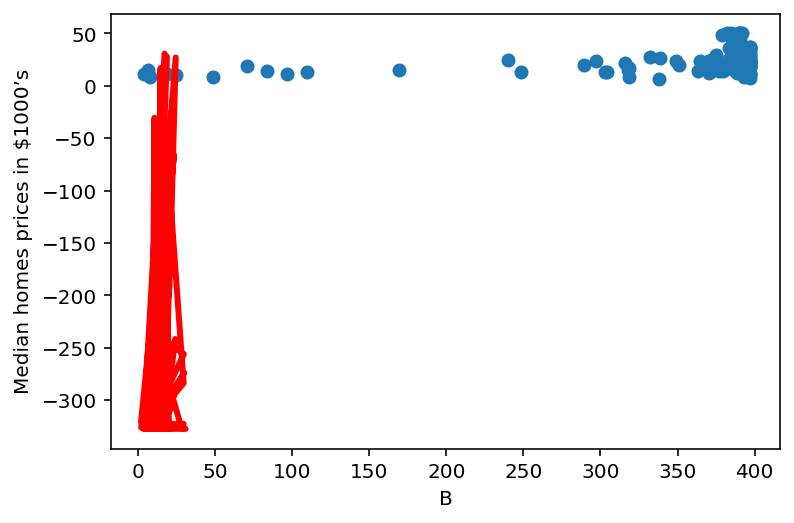

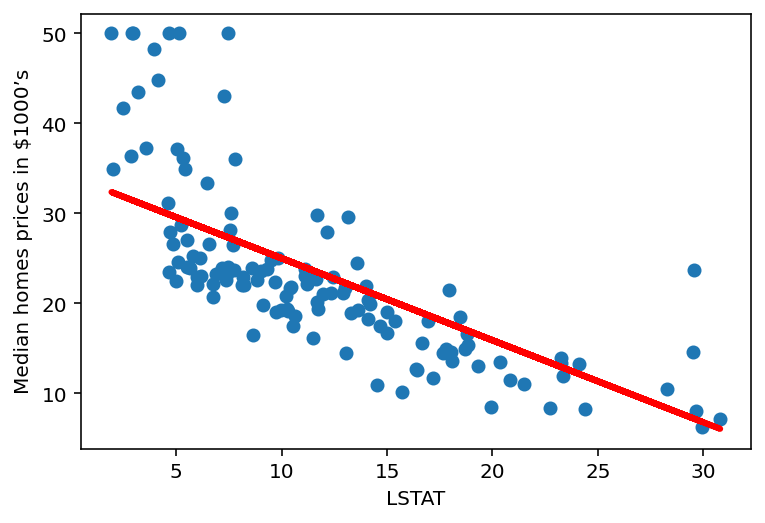

In [35]:
xs_all = boston.data
ys = boston.target
for idx in range(xs_all.shape[1]):
    FT_NAME = boston.feature_names[idx]
    xs_each = xs_all[:, np.newaxis, idx]

    xs_each_tr, xs_each_tst, ys_train, ys_test = train_test_split(
    xs_each, ys, random_state=1
    )

    model_1d_exo = LinearRegression()
    model_1d_exo.fit(xs_each_tr, ys_train)
    ys_each_pred = model_1d.predict(xs_each_tst)

    plt.scatter(xs_each_tst[:, -1], ys_test)
    plt.plot(xs_test[:, -1], ys_each_pred, color="red", linewidth=3)
    plt.xlabel(FT_NAME)
    plt.ylabel("Median homes prices in $1000’s")
    plt.show()


In [ ]:
some_features = ['AGE', 'DIS', 'RAD']
